
Understanding what factors are associated with employee satisfaction, employee turnover and employee retention can help a company keep valuable human resources.  To help understand these factors we have a database of employees and elements related to the employees experience at the company.  We expect positive factors such as high rate of pay to have a positive correlation with employee satisfaction and retention and negative factors, like work accidents and low rate of pay to have a negative correlation.  

# Exploritory Questions
1. What factors are correlated with employee satisfaction?
2. What factors are correlated with employees who have left the company?
3. What factors are shared among the employees who have been with the company the longest?

For our 15000 employees we have the following information: satisfaction level, latest evaluation (yearly), number of project worked on, average monthly hours, time spend in the company (in years), work accident (within the past 2 years), promotion within the past 5 years, department and salary.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from collections import Counter
import scipy as scipy
from scipy.stats import ttest_ind

df = pd.read_csv('HR_comma_sep.csv')

In [71]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Question 1
What factors are correlated with employee satisfaction?

# Hypothesis
Positive factors such as high pay and low hours will correlate to high employee satisfaction.

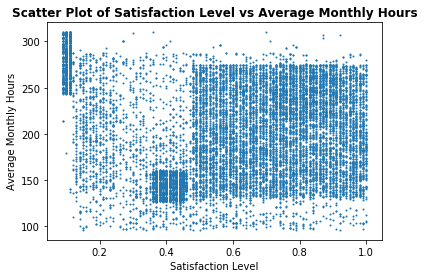

In [45]:
plt.scatter(x=df['satisfaction_level'], y=df['average_montly_hours'], s=1)
plt.title('Scatter Plot of Satisfaction Level vs Average Monthly Hours', fontsize=12, fontweight='bold')
plt.ylabel('Average Monthly Hours')
plt.xlabel ('Satisfaction Level')
plt.show()

# Analysis
In comparing employee satisfaction with average monthly hours we found that working above 225 average monthly hours correlates to very low satisfaction.  There is also a large group of employees with low satisfaction rating that worked 125 to 155 average monthly hours.


In comparing employee satisfaction with average monthly hours we found that working above 225 average monthly hours correlates to very low satisfaction.  There is also a large group of employees with low satisfaction rating that worked 125 to 155 average monthly hours.

Next we will compare salary level (low, medium or high) with average employee satisfaction.  Before we do though we must determine if we can reject the null hypothesis (i.e. determine if there is a relationship between the salary level and average employee satisfaction).  In order to do that we need to see if our data has a normal distribution.

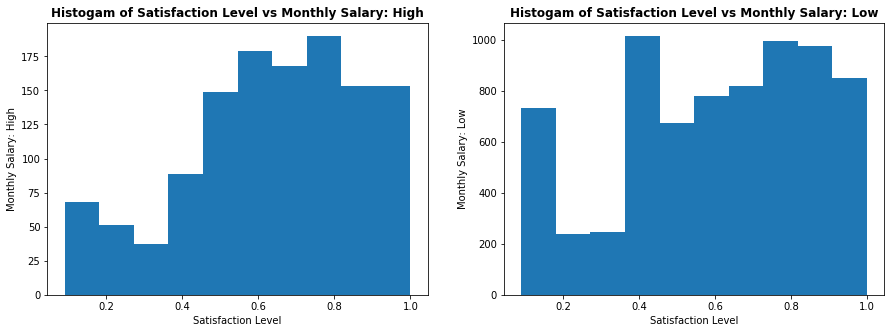

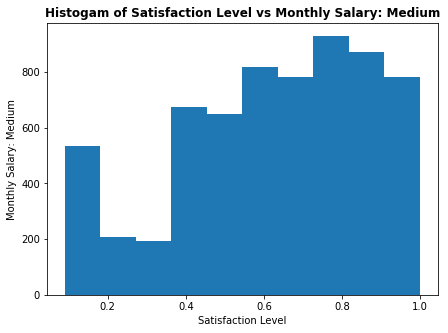

In [51]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['salary'] == 'high'].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Monthly Salary: High', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Salary: High')
plt.xlabel ('Satisfaction Level')
plt.subplot(1, 2, 2)
plt.hist(df[df['salary'] == 'low'].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Monthly Salary: Low', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Salary: Low')
plt.xlabel ('Satisfaction Level')
plt.show()
plt.figure(figsize=(7, 5))
plt.hist(df[df['salary'] == 'medium'].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Monthly Salary: Medium', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Salary: Medium')
plt.xlabel ('Satisfaction Level')
plt.show()

The histograms reveal that the data is not normally distributed. In order to reject the null hypothesis we must run the Mann-Whitney test.  We do that below.

In [86]:
ptest = scipy.stats.mannwhitneyu(df[df['salary'] == 'high'].satisfaction_level, 
                                 df[df['salary'] == 'medium'].satisfaction_level).pvalue

print ('high vs medium:',ptest)
ptest = scipy.stats.mannwhitneyu(df[df['salary'] == 'high'].satisfaction_level, 
                                 df[df['salary'] == 'low'].satisfaction_level).pvalue

print ('high vs low:', ptest)
ptest = scipy.stats.mannwhitneyu(df[df['salary'] == 'medium'].satisfaction_level, 
                                 df[df['salary'] == 'low'].satisfaction_level).pvalue
print ('medium vs low:', ptest)

high vs medium: 0.0643467316007
high vs low: 1.31173657022e-05
medium vs low: 1.85378640434e-06


We have three values to compare against each other so we ran the Mann-Whitney test for each comparison. The findings show that we can compare the satisfaction levels of employees with high salaries with employees with low salaries with a high level of accuracy.  We can do the same for employees with medium salaries and low salaries.  However we can not compare the average satisfaction levels of employees with high salaries against the average satisfaction levels of employees with medium salaries with a high level of accuracy.

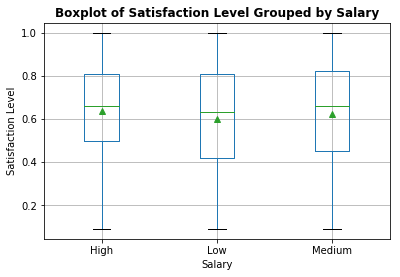

In [55]:
df.boxplot(
    column='satisfaction_level', 
    by='salary',
    showmeans=True
)
plt.title('Boxplot of Satisfaction Level Grouped by Salary', fontsize=12, fontweight='bold')
plt.suptitle("")
plt.ylabel ('Satisfaction Level')
plt.xlabel ('Salary')
plt.xticks([1, 2, 3], ['High', 'Low', 'Medium'])
plt.show()

The box plot above shows the average satisfaction levels grouped by Salary. We expected high salary to correlate to high satisfaction.  What we find is that there is very little different in employee satisfaction between those employees that make a high salary vs those that make a low salary.  We also find that there is very little difference in employee satisfaction ratings between employees that make a medium level salary and those that make a low salary.  While employees that make a low salary have the lowest satisfaction level, it is not significantly lower than employees who make a high or medium salary level.

We would expect employees that have a had a work accident to have a low satisfaction rating.  We will compare the average satisfaction level of employees who have had an accident with those who have not. Again, we must first confirm the the relationship between the two is more that meer chance.

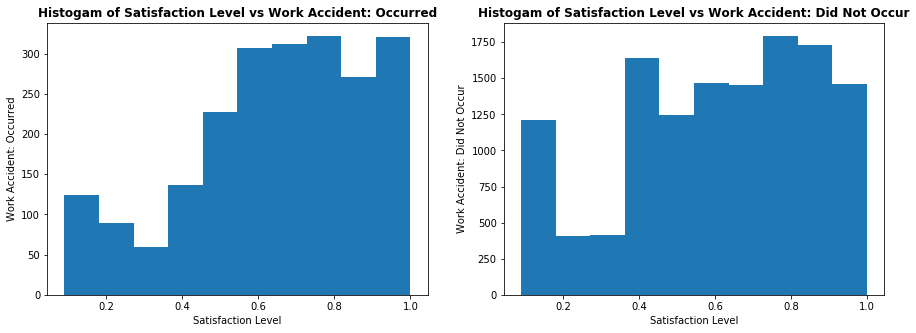

In [52]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['Work_accident'] == 1].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Work Accident: Occurred', fontsize=12, fontweight='bold')
plt.ylabel('Work Accident: Occurred')
plt.xlabel ('Satisfaction Level')
plt.subplot(1, 2, 2)
plt.hist(df[df['Work_accident'] == 0].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Work Accident: Did Not Occur', fontsize=12, fontweight='bold')
plt.ylabel('Work Accident: Did Not Occur')
plt.xlabel ('Satisfaction Level')
plt.show()

The histograms for employee satisfaction level and whether a work accident occurred are both non normal. In order to confirm that these groups of data are related we must use the Mann-Whitney test.  This is done below.

In [88]:

ptest = scipy.stats.mannwhitneyu(df[df['Work_accident'] == 1].satisfaction_level, 
                                 df[df['Work_accident'] == 0].satisfaction_level).pvalue
print (ptest)

2.6214535727e-12


The Mann-Whitney test showed that we can compare these two data sets with a high degree of accuracy.

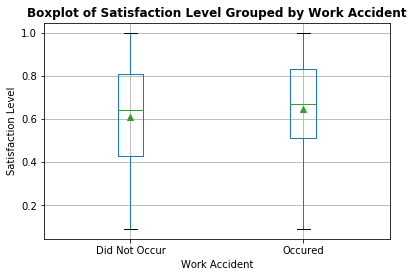

In [56]:
df.boxplot(
    column='satisfaction_level', 
    by='Work_accident',
    showmeans=True
)
plt.title('Boxplot of Satisfaction Level Grouped by Work Accident', fontsize=12, fontweight='bold')
plt.suptitle("")
plt.ylabel ('Satisfaction Level')
plt.xlabel ('Work Accident')
plt.xticks([1, 2], ['Did Not Occur', 'Occured'])
plt.show()

We expected employees who experienced a work accident to have a low satisfaction level.  This is not the case.  In fact, employees who have experienced a work accident have a slightly higher satisfaction level.

Next we will look at the satisfaction level of employees who have been promoted in the past 5 years.  We will compare the average satisfaction level of those who have been promoted with those who have not.  We expect that those who have had a promotion will have a higher level of satisfaction.  Since we are working with averages again we must test to ensure they are related.

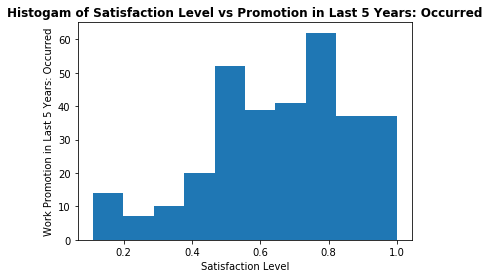

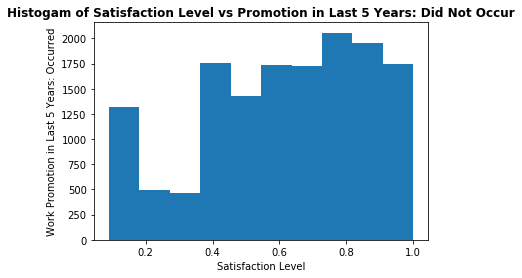

In [58]:

plt.hist(df[df['promotion_last_5years'] == 1].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Promotion in Last 5 Years: Occurred', fontsize=12, fontweight='bold')
plt.ylabel('Work Promotion in Last 5 Years: Occurred')
plt.xlabel ('Satisfaction Level')
plt.show()
plt.hist(df[df['promotion_last_5years'] == 0].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Promotion in Last 5 Years: Did Not Occur', fontsize=12, fontweight='bold')
plt.ylabel('Work Promotion in Last 5 Years: Occurred')
plt.xlabel ('Satisfaction Level')
plt.show()

In [12]:
print (ptest)
ptest = scipy.stats.mannwhitneyu(df[df['promotion_last_5years'] == 1].satisfaction_level, 
                                 df[df['promotion_last_5years'] == 0].satisfaction_level).pvalue

6.38478299218e-09


The histograms showed that the two data sets were indeed related.  Using the Mann-Whitney test showed that the two groups can be compared with a high degree of accuracy. We will compare the two data sets in the box plot below.

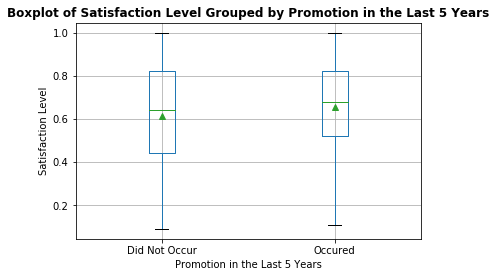

In [59]:
df.boxplot(
    column='satisfaction_level', 
    by='promotion_last_5years',
    showmeans=True
)
plt.title('Boxplot of Satisfaction Level Grouped by Promotion in the Last 5 Years', fontsize=12, fontweight='bold')
plt.suptitle("")
plt.ylabel ('Satisfaction Level')
plt.xlabel ('Promotion in the Last 5 Years')
plt.xticks([1, 2], ['Did Not Occur', 'Occured'])
plt.show()

We expected promotion in last 5 years correlate with higher satisfaction.  Employees that did have a promotion in the last 5 years had only a slightly higher satisfaction level than those that did not. There was not a significant difference between the two.

# Summary
Positive factors such as high level of pay and having a promotion in the last 5 years did not correlate with high employee satisfaction.  Negative factors such as low rate of pay and experiencing a work accident did not correlate with a low employee satisfaction either.  The only factor that correlated with a employee satisfaction was hours worked.  A high number of hours worked correlated with an extremely low level of employee satisfaction.

# Question 2
What factors are correlated with employees who have left the company?

# Hypothesis
We expect negative factors such as low rate of pay and work accidents to correlate with employees who have left the company.

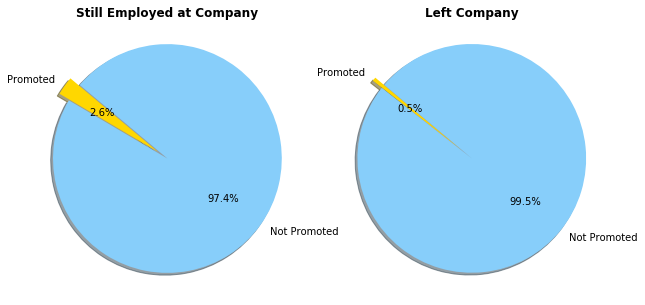

In [63]:
df_left = df[df['left'] == 1]
df_stayed = df[df['left'] == 0]

labels = 'Promoted', 'Not Promoted'

colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sizes = [len(df_stayed[df_stayed['promotion_last_5years'] == 1]), 
         len(df_stayed[df_stayed['promotion_last_5years'] == 0])]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Still Employed at Company', fontsize=12, fontweight='bold')
plt.subplot(1, 2, 2)
sizes = [len(df_left[df_left['promotion_last_5years'] == 1]), 
         len(df_left[df_left['promotion_last_5years'] == 0])]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Left Company', fontsize=12, fontweight='bold')
plt.show()

# Analysis
A promotion in the last 5 years is considered a positive factor.  We expect to see that most employees who have left the company have a lower percentage of promotions in the past 5 years than those who have stayed. While a higher percentage of employees who have stayed with the company have been promoted, the difference between those that stayed and those that left if not significant.


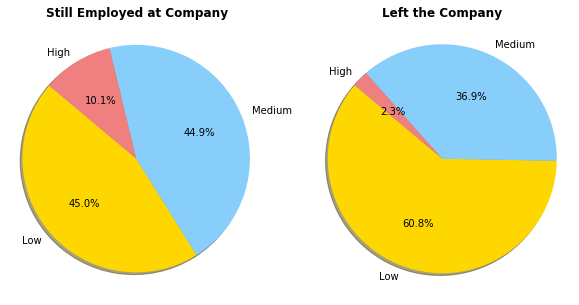

In [68]:
labels = 'Low', 'Medium', 'High'
colors = ['gold', 'lightskyblue', 'lightcoral']
 
# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sizes = [len(df_stayed[df_stayed['salary'] == 'low']), 
         len(df_stayed[df_stayed['salary'] == 'medium']),
         len(df_stayed[df_stayed['salary'] == 'high'])]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Still Employed at Company', fontsize=12, fontweight='bold')
plt.subplot(1, 2, 2)
sizes = [len(df_left[df_left['salary'] == 'low']), 
         len(df_left[df_left['salary'] == 'medium']),
         len(df_left[df_left['salary'] == 'high'])]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Left the Company', fontsize=12, fontweight='bold')
plt.show()

Comparing salaries between employees who have stayed with the company and employees who have left offers both a positive and negative factor to compare.  High salaries being the positive factor and low salaries being the negative.  We expect a lower salary to correlate with employees who have left and a higher salary to correlate with people who are still employed with the company.  That is in fact what we find when comparing salaries.  More employees who left the company had lower salaries. A higher percentage of employees who are still with the company have a high salary.

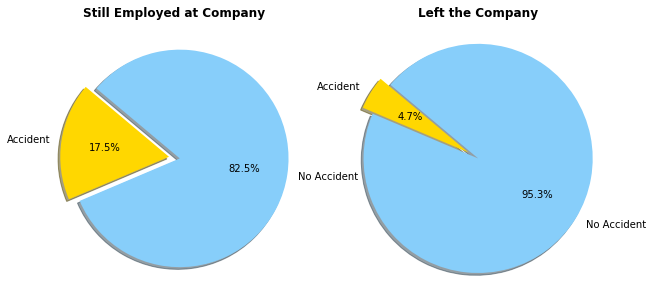

In [65]:
labels = 'Accident', 'No Accident'

colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sizes = [len(df_stayed[df_stayed['Work_accident'] == 1]), 
         len(df_stayed[df_stayed['Work_accident'] == 0])]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Still Employed at Company', fontsize=12, fontweight='bold')
plt.subplot(1, 2, 2)
sizes = [len(df_left[df_left['Work_accident'] == 1]), 
         len(df_left[df_left['Work_accident'] == 0])]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Left the Company', fontsize=12, fontweight='bold')
plt.show()

Work accidents are a negative factor.  We expect that more employees who have experienced a work accident to have left the company.  What we find is the opposite.  Employees who are still with the company have experienced a work accident than those who have left.

We have seen that a high number of work hours correlates to low employee satisfaction.  We will now compare the average number of work hours between employees who are with the company vs those who have left.  Before we compare the two data set though we must verify that there is a relationship between them.

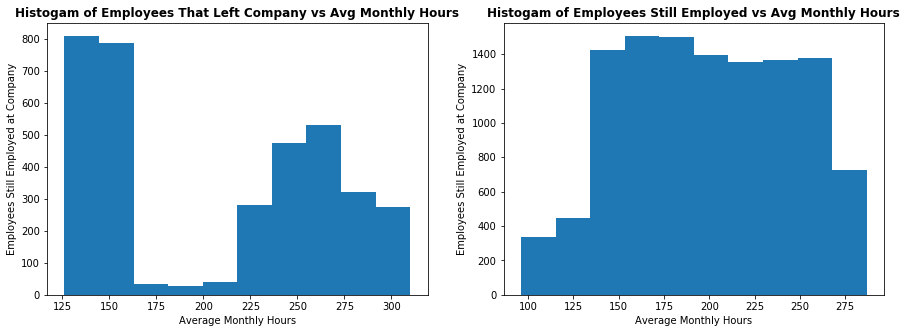

In [71]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['left'] == 1].average_montly_hours)
plt.title('Histogam of Employees That Left Company vs Avg Monthly Hours', fontsize=12, fontweight='bold')
plt.ylabel('Employees Still Employed at Company')
plt.xlabel ('Average Monthly Hours')
plt.subplot(1, 2, 2)
plt.hist(df[df['left'] == 0].average_montly_hours)
plt.title('Histogam of Employees Still Employed vs Avg Monthly Hours', fontsize=12, fontweight='bold')
plt.ylabel('Employees Still Employed at Company')
plt.xlabel ('Average Monthly Hours')
plt.show()

In [3]:

ptest = scipy.stats.mannwhitneyu(df[df['left'] == 1].average_montly_hours, 
                                 df[df['left'] == 0].average_montly_hours).pvalue
print (ptest)

6.38478299218e-09


The histograms of the employees that left the company vs the average monthly hours and the employees still employed vs the average mothly hours both show non-normal distributions.  Because of this the Mann-Whitney test was used to confirm that the data sets are more than related by random chance.  The test revealed that the data set are related and we can proceed with the comparison.

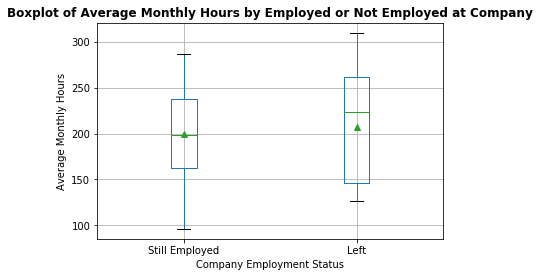

In [92]:
df.boxplot(
    column='average_montly_hours', 
    by='left',
    showmeans=True
)
plt.title('Boxplot of Average Monthly Hours by Employed or Not Employed at Company', fontsize=12, fontweight='bold')
plt.suptitle("")
plt.ylabel ('Average Monthly Hours')
plt.xlabel ('Company Employment Status')
plt.xticks([1, 2], ['Still Employed', 'Left'])
plt.show()

A high number of average hours worked in the month would be a negative factor.  We would expect employees who have left would be among those that had a high number of average hours worked in a month.  In fact the difference in average hours worked in a month between employees who left vs those that stayed is not significant.

# Summary
The only significant factor correlated with people leaving the company was low rate of pay.  Not having a promotion in the last 5 years did not correlate with an employee leaving. People who left the company also did not have a significantly higher number of average work hours per month. The negative factor of work place accidents was unexpectededly higher in employees who have stayed with the company. 

# Question 3
What factors are shared among the employees who have been with the company the longest?

# Hypothesis
Employes who have been with the company the longest will have higher pay and a higher percentage of promotions.

# Analysis
Before we start comparing factors of employees who have been with the company for a while vs those that have not, lets view the distribution of employees based on number of years at the company.

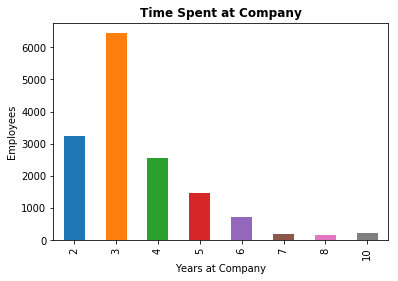

In [83]:
df['time_spend_company'].value_counts().sort_index().plot(kind='bar')
plt.title('Time Spent at Company', fontsize=12, fontweight='bold')
plt.ylabel ('Employees')
plt.xlabel ('Years at Company')
plt.show()

In [93]:
df_7plus = df[df['time_spend_company'] >= 7]
df_lessthan7 = df[df['time_spend_company'] < 7]
len(df_7plus)

564

In viewing the distribution of the employees vs number of years we see that most employees have been with the company for 3 years.  After 3 years there is a drop off of more than half the number of employees who have been with the company for 5 years.  This is followed by a gradual decline until we reach year 7.  The number of employees who have been with the company 7, 8 or 10 years is comparable between the years.  We will use this group to review factors that might be correlated with long term employees.

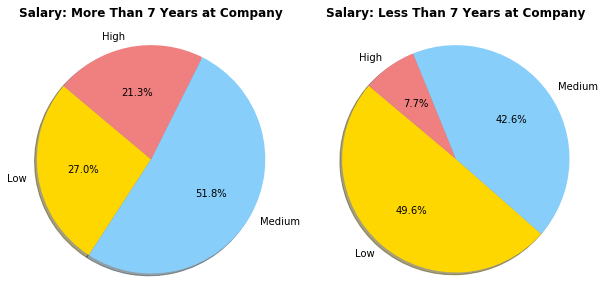

In [82]:
labels = 'Low', 'Medium', 'High'

colors = ['gold', 'lightskyblue', 'lightcoral']
 
# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sizes = [len(df_7plus[df_7plus['salary'] == 'low']), 
         len(df_7plus[df_7plus['salary'] == 'medium']),
         len(df_7plus[df_7plus['salary'] == 'high'])]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Salary: More Than 7 Years at Company', fontsize=12, fontweight='bold')
plt.subplot(1, 2, 2)
sizes = [len(df_lessthan7[df_lessthan7['salary'] == 'low']), 
         len(df_lessthan7[df_lessthan7['salary'] == 'medium']),
         len(df_lessthan7[df_lessthan7['salary'] == 'high'])]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Salary: Less Than 7 Years at Company', fontsize=12, fontweight='bold')
plt.show()

We expect that long term employees would have higher percentage of high salaries.  That is what we find. Employees that have been with the company more than 7 years have high salaries vs those with the company less than 7 years.  We also see that there are significantly fewer long term employees with low salaries.

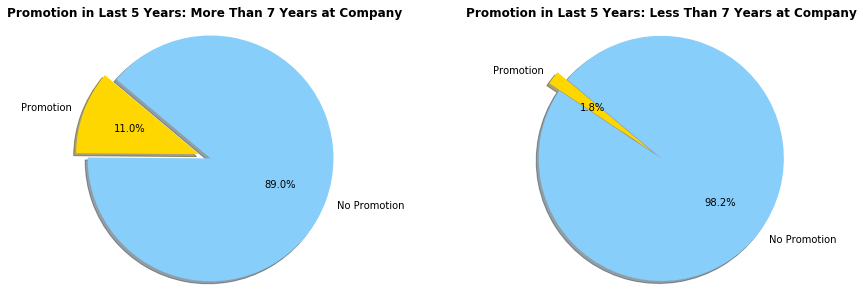

In [81]:
labels = 'Promotion', 'No Promotion'

colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sizes = [len(df_7plus[df_7plus['promotion_last_5years'] == 1]), 
         len(df_7plus[df_7plus['promotion_last_5years'] == 0])]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Promotion in Last 5 Years: More Than 7 Years at Company', fontsize=12, fontweight='bold')
plt.subplot(1, 2, 2)
sizes = [len(df_lessthan7[df_lessthan7['promotion_last_5years'] == 1]), 
         len(df_lessthan7[df_lessthan7['promotion_last_5years'] == 0])]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Promotion in Last 5 Years: Less Than 7 Years at Company', fontsize=12, fontweight='bold')
plt.show()

We would expect employees who have been with the company more than 7 years to have had a higher percentage of promotions in the past 5 years.  That is what we found.  A significantly higher percentage of long term employees have been promoted in the past 5 years.

# Summary
There was a correlation between employee salarys and high number of years of employment.  There was also a correlation with long term employees and promotions in the past 5 years.  

# Conclusion

Given the coorelation between a large number of monthly work hours and employee satisfaction, avoiding work hours above 250 per month could have a increase in employee satisfaction but will not effect turn over.  A higher salary was correlated with people who have sayed at the company.  It was also correlated with employees who have stayed with the company more than 7 years.  A high could help with turn over and employee retention but will not increase employee satisfaction.   